In [81]:
import act
from datetime import datetime
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np 
from netCDF4 import Dataset
import pandas as pd

# Set your username and token here!
# Read more on how to retrive your token:
# https://arm-doe.github.io/ACT/API/generated/act.discovery.download_arm_data.html#act.discovery.download_arm_data
username = 'izabalaugr'
token = '290809cda304e73a'

datastream = "anxaosccnsmpskappaM1.c1"
target_variable='N_CCN'
# Read NetCDF files
from datetime import datetime
startdate = '20200309'
enddate = '20200315'
files = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds = act.io.read_arm_netcdf(files)

[DOWNLOADING] anxaosccnsmpskappaM1.c1.20200310.002602.nc
[DOWNLOADING] anxaosccnsmpskappaM1.c1.20200309.003204.nc
[DOWNLOADING] anxaosccnsmpskappaM1.c1.20200313.003849.nc
[DOWNLOADING] anxaosccnsmpskappaM1.c1.20200311.022138.nc
[DOWNLOADING] anxaosccnsmpskappaM1.c1.20200312.013206.nc
[DOWNLOADING] anxaosccnsmpskappaM1.c1.20200314.005637.nc

If you use these data to prepare a publication, please cite:

Kulkarni, G., Levin, M., & Shilling, J. CCN Counter derived hygroscopicity
parameter kappa (AOSCCNSMPSKAPPA). Atmospheric Radiation Measurement (ARM) User
Facility. https://doi.org/10.5439/1729907



In [89]:
# Apply quality control where qc_N_CCN > 0
ds_filtered = ds.where(ds['qc_N_CCN'] == 0)
#ds_filtered.clean.cleanup()
#ds_filtered = act.qc.arm.add_dqr_to_qc(ds_filtered)
#ds_filtered.qcfilter.datafilter(rm_assessments=['Bad'], del_qc_var=False)

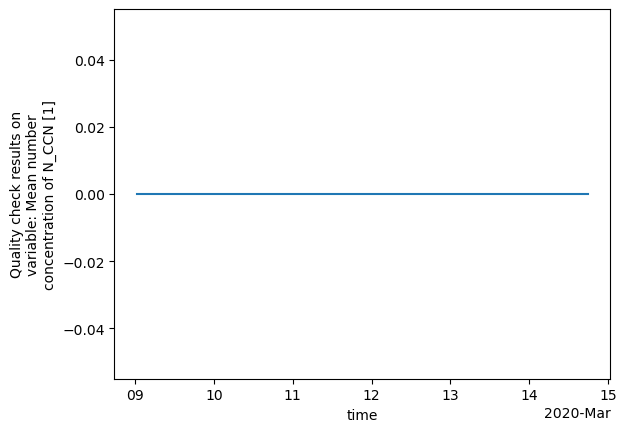

In [90]:
ds.qc_N_CCN.plot()

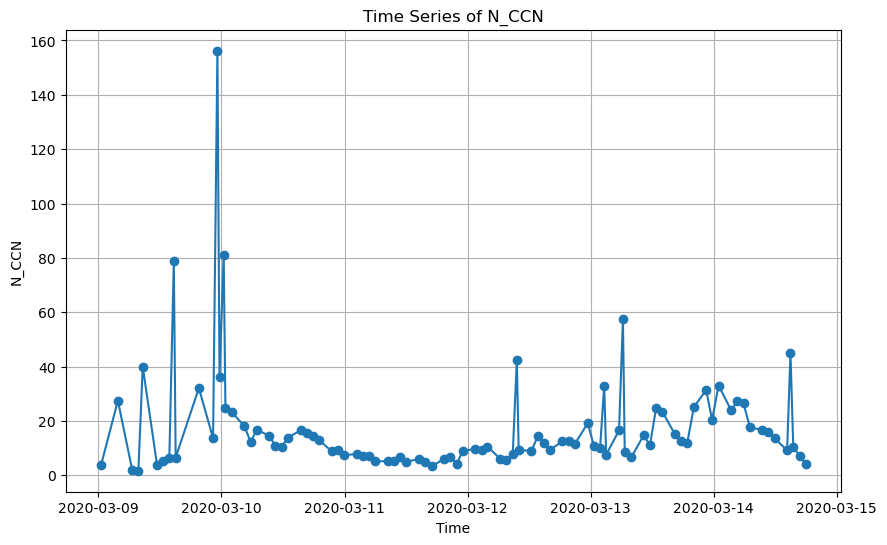

In [91]:

plt.figure(figsize=(10, 6))
plt.plot(ds_filtered['time'].values, ds_filtered['N_CCN'].values, marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('N_CCN')
plt.title('Time Series of N_CCN')
plt.grid(True)
plt.show()

In [99]:
# Round supersaturation values to one decimal place
supersaturation_set_point_rounded = np.round(ds_filtered['setpoint'].values, 1)

# Get unique rounded supersaturation values
unique_supersaturation = np.unique(supersaturation_set_point_rounded)

In [120]:
unique_supersaturation

array([0. , 0.1, 0.2, 0.4, 0.6, 0.8, 1. ], dtype=float32)

ValueError: the first argument to .assign_coords must be a dictionary

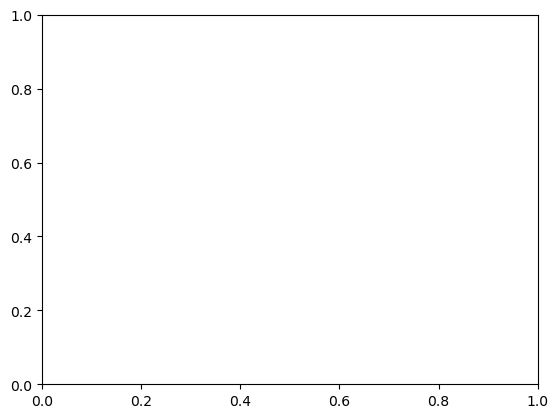

In [131]:
fig,ax = plt.subplots()
    
ds_filtered["

In [105]:
mask

<xarray.DataArray (setpoint: 7, time: 93)> Size: 651B
dask.array<bitwise_and, shape=(7, 93), dtype=bool, chunksize=(7, 18), chunktype=numpy.ndarray>
Coordinates:
  * setpoint  (setpoint) float32 28B 0.0 0.1 0.2 0.4 0.6 0.8 1.0
  * time      (time) datetime64[ns] 744B 2020-03-09T00:32:04 ... 2020-03-14T1...

In [132]:
# Set up the plot
plt.figure(figsize=(12, 8))

# Loop over each unique rounded supersaturation value and plot the corresponding N_CCN_cleaned
for ss_value in unique_supersaturation:
    # Create a mask for the current supersaturation value
    mask = (np.round(ds_filtered['setpoint'], 1) == ss_value) & (~np.isnan(ds_filtered['N_CCN']))

    
    # Filter time and N_CCN values based on the mask
    time_filtered = ds_filtered['time'][mask].values
    N_CCN_filtered = ds_filtered['N_CCN'][mask].values
    
    plt.plot(time_filtered, N_CCN_filtered, label=f'{ss_value:.1f}', marker='.')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('N_CCN')
plt.title('N_CCN')
plt.legend(title='Supersaturation')

# Show grid and display the plot
plt.grid(True)
plt.show()


IndexError: Boolean array size 7 is used to index array with shape (93,).

<Figure size 1200x800 with 0 Axes>

In [31]:
supersaturation_set_point_rounded = np.round(setpoint, 1)

del mask
del unique_supersaturation
# Get unique rounded supersaturation_set_point values
unique_supersaturation = np.unique(supersaturation_set_point_rounded)

# Plotting
plt.figure(figsize=(12, 8))

# Loop over each unique rounded supersaturation value and plot the corresponding N_CCN_cleaned
for ss_value in unique_supersaturation:
    mask = (supersaturation_set_point_rounded == ss_value)
    plt.plot(Time[mask], N_CCN_cleaned[mask], label=f'{ss_value:.1f}', marker='.')

plt.title('N_CCN_qc')
plt.xlabel('Time')
plt.ylabel('N_CCN')
plt.legend(title='Supersaturation')
plt.grid(True)
plt.show()

IndexError: Boolean array size 7 is used to index array with shape (93,).

<Figure size 1200x800 with 0 Axes>

In [24]:
# Convert time to datetime objects
#Time = ds.variables['time'][:]
time_units = ds.variables['Time'].units
time_base_date = nc.num2date(0, time_units)
time_converted = nc.num2date(time, time_units)

# Extract hours of the day from the time variable
hours_of_day = np.array([t.hour + t.minute / 60.0 for t in time_converted])

# Plotting
plt.figure(figsize=(12, 8))

# Loop over each unique rounded supersaturation value and plot the daily pattern
for ss_value in unique_supersaturation:
    mask = (supersaturation_set_point_rounded == ss_value)
    plt.plot(hours_of_day[mask], N_CCN_cleaned[mask], label=f'{ss_value:.1f}', marker='o', linestyle='None')

plt.title('Daily Pattern')
plt.xlabel('Hour of Day')
plt.ylabel('N_CCN_cleaned')
plt.legend(title='Supersaturation Set Point')
plt.grid(True)
plt.show()

KeyError: 'Time'